In [2]:
%matplotlib inline
from os import listdir
from os.path import isfile, join
import numpy as np
from glob import glob
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib
import statsmodels.stats.multitest as smt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
from adjustText import adjust_text
from scipy import stats
import itertools
import matplotlib.patches as mpatches

In [6]:
## Read samples location info
dir_path = '/Users/osipova/Documents/LabDocs/Leatherback_popgen/'
file_name = 'dc_ALL_rounds_info.tsv'
file_data = glob(dir_path + file_name)[0]
INFO = pd.read_csv(file_data, sep='\t')[['Sample_ID', 'country']]
INFO.rename(columns={'Sample_ID':'sample', 'country':'country'}, inplace=True)

In [3]:
## Read summary file with total number of variants by impact
dir_path = '/Users/osipova/Documents/LabDocs/Leatherback_popgen/'
file_name = 'all_samples.total_variant_by_impact.tsv'
file_data = glob(dir_path + file_name)[0]
df = pd.read_csv(file_data, sep='\t')

## Assign location to each sample
df_all = pd.merge(df, INFO, on='sample')
df_all.head(3)

,sample,HIGH,LOW,MODERATE,MODIFIER,country
0,dc_100028_bb_noq,4475.0,34912.0,21640.0,6624812.0,Mexico
1,dc_100029_bb_noq,4877.0,33342.0,20476.0,6365980.0,Mexico
2,dc_100030_bb_noq,4645.0,35234.0,20965.0,6986159.0,Mexico


## Plot total number of variants by impact

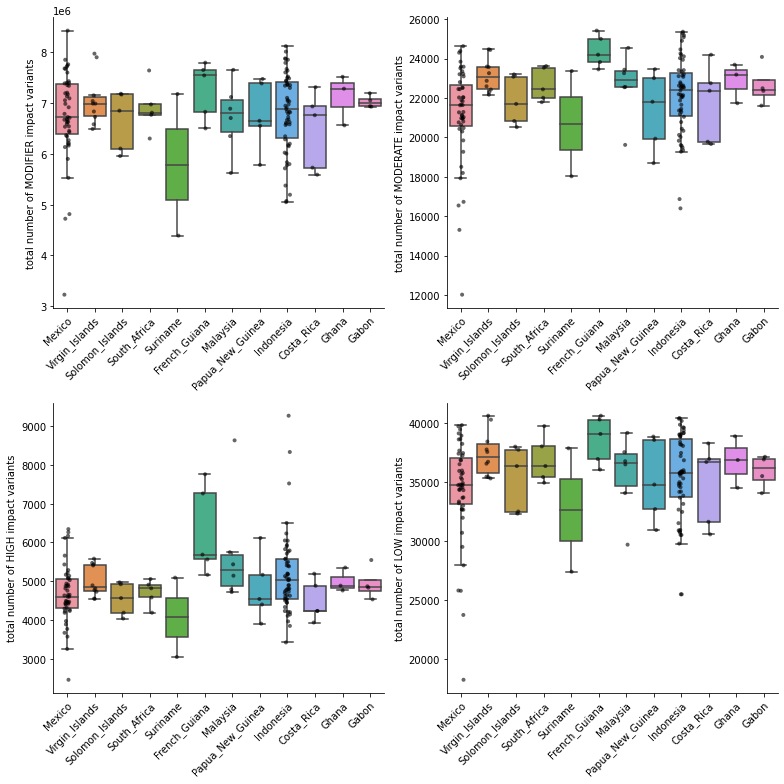

In [37]:
impacts = list(set(df_all.columns) - set(['sample', 'country']))

fig, axes = plt.subplots(2, 2, figsize = (11, 11))

for i in range(len(impacts)):
    j = i % 2
    k = i // 2
    axi = axes[j][k]
    impact = impacts[i]
    sns.boxplot(ax=axi, data=df_all, x='country', y=impact, showfliers=False)
    sns.stripplot(ax=axi, data=df_all, x='country', y=impact, color='black', alpha=0.6, s=4)
    plt.setp(axi.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    axi.set_ylabel('total number of {} impact variants'.format(impact))
    axi.set_xlabel('')
    
    
sns.despine(fig=None, ax=None, left=False, bottom=False, offset=None, trim=False)
fig.tight_layout()

pdf_name = 'total_number_variants_by_impact.pdf'
# fig.savefig(pdf_name, bbox_inches='tight')

## Plot fraction of variants by impact

In [42]:
df_all['total'] = df_all['HIGH'] + df_all['LOW'] + df_all['MODERATE'] + df_all['MODIFIER']

for impact in impacts:
    impact_fraction = '{}_f'.format(impact)
    df_all[impact_fraction] = df_all[impact] / df_all['total'] * 100
df_all.head(3)

,sample,HIGH,LOW,MODERATE,MODIFIER,country,total,MODIFIER_f,HIGH_f,MODERATE_f,LOW_f
0,dc_100028_bb_noq,4475.0,34912.0,21640.0,6624812.0,Mexico,6685839.0,99.087220,0.066933,0.323669,0.522178
1,dc_100029_bb_noq,4877.0,33342.0,20476.0,6365980.0,Mexico,6424675.0,99.086413,0.075910,0.318709,0.518968
2,dc_100030_bb_noq,4645.0,35234.0,20965.0,6986159.0,Mexico,7047003.0,99.136598,0.065915,0.297502,0.499986


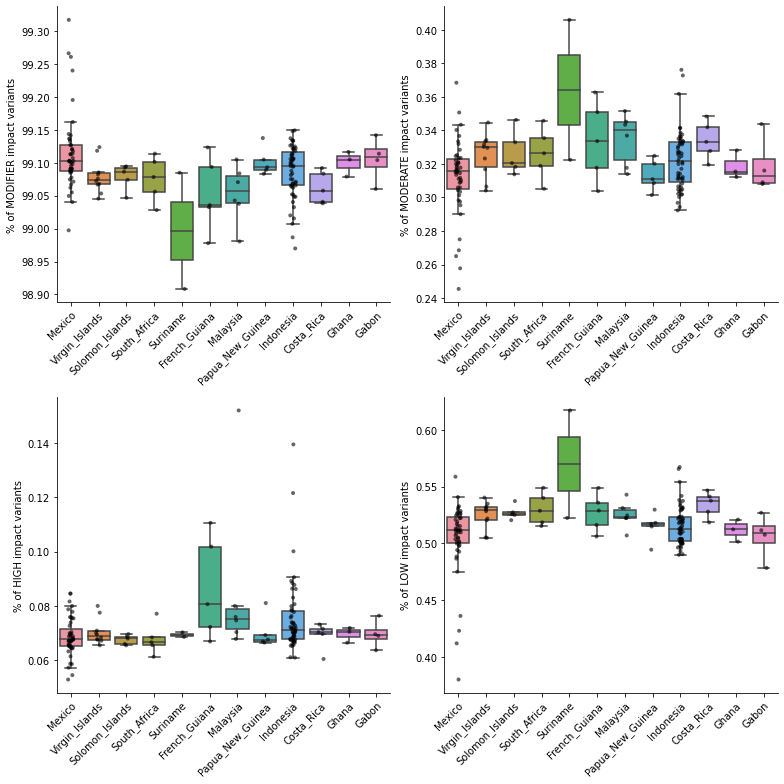

In [41]:
fig, axes = plt.subplots(2, 2, figsize = (11, 11))

for i in range(len(impacts)):
    j = i % 2
    k = i // 2
    axi = axes[j][k]
    impact = impacts[i]
    sns.boxplot(ax=axi, data=df_all, x='country', y='{}_f'.format(impact), showfliers=False)
    sns.stripplot(ax=axi, data=df_all, x='country', y='{}_f'.format(impact), color='black', alpha=0.6, s=4)
    plt.setp(axi.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    axi.set_ylabel('% of {} impact variants'.format(impact))
    axi.set_xlabel('')
    
    
sns.despine(fig=None, ax=None, left=False, bottom=False, offset=None, trim=False)
fig.tight_layout()

pdf_name = 'percent_variants_by_impact.pdf'
# fig.savefig(pdf_name, bbox_inches='tight')

## Plot homozygotes and heterozygotes by impact

In [10]:
dir_path = '/Users/osipova/Documents/LabDocs/Leatherback_popgen/'
file_name = 'all_samples.hom_het_by_impact.tsv'
file_data = glob(dir_path + file_name)[0]
df = pd.read_csv(file_data, sep='\t')

## Assign location to each sample
df_all = pd.merge(df, INFO, on='sample')
df_all.head(3)

,sample,impact,state,number,country
0,dc_100028_bb_noq,HIGH,hom,2074,Mexico
1,dc_100028_bb_noq,MODERATE,hom,2524,Mexico
2,dc_100028_bb_noq,LOW,hom,4073,Mexico


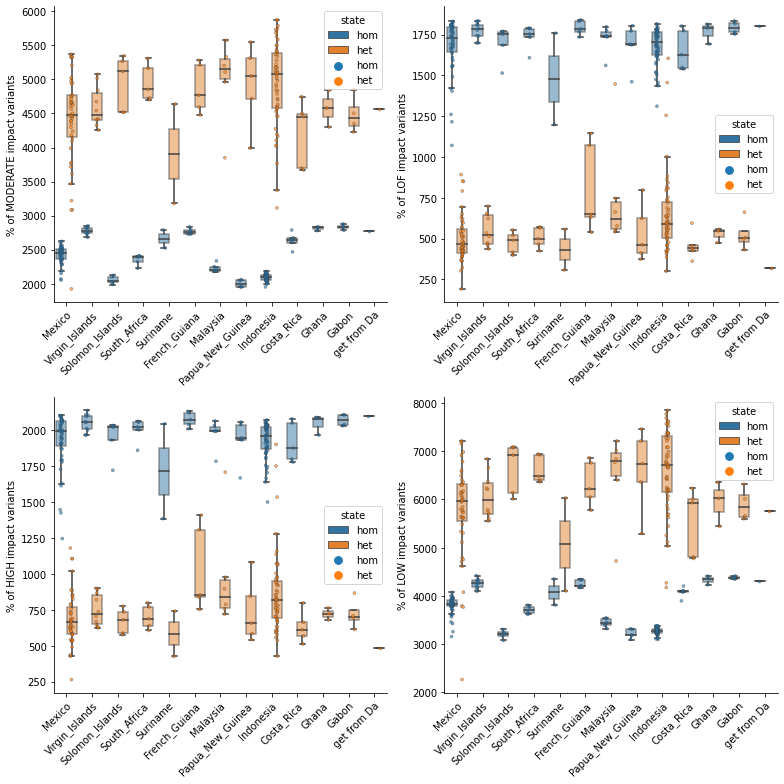

In [16]:
fig, axes = plt.subplots(2, 2, figsize = (11, 11))
impacts = list(set(df_all['impact']))


for i in range(len(impacts)):
    j = i % 2
    k = i // 2
    axi = axes[j][k]
    impact = impacts[i]
    dfi = df_all[df_all['impact'] == impact]
    
    sns.boxplot(ax=axi, data=dfi, x='country', y='number', hue='state', 
                showfliers=False, boxprops=dict(alpha=0.5))
    sns.stripplot(ax=axi, data=dfi, x='country', y='number', hue='state', 
                  alpha=0.6, s=3, dodge=True, linewidth=0.5)
    
    plt.setp(axi.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    axi.set_ylabel('% of {} impact variants'.format(impact))
    axi.set_xlabel('')
    
    
sns.despine(fig=None, ax=None, left=False, bottom=False, offset=None, trim=False)
fig.tight_layout()

pdf_name = 'percent_variants_by_impact.pdf'
# fig.savefig(pdf_name, bbox_inches='tight')